In [638]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [639]:
df = pd.read_csv('C:/Users/manjeet.singh/Desktop/A_T.csv')

In [640]:
print(list(df.columns))
df.info()
df.head()
df.shape
df.isnull().any()

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'Hired']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
C1       690 non-null object
C2       690 non-null float64
C3       690 non-null float64
C4       690 non-null object
C5       690 non-null object
C6       690 non-null object
C7       690 non-null object
C8       690 non-null float64
C9       690 non-null object
C10      690 non-null object
C11      690 non-null int64
C12      690 non-null object
C13      690 non-null object
C14      690 non-null int64
C15      690 non-null int64
Hired    690 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 86.3+ KB


C1       False
C2       False
C3       False
C4       False
C5       False
C6       False
C7       False
C8       False
C9       False
C10      False
C11      False
C12      False
C13      False
C14      False
C15      False
Hired    False
dtype: bool

Our data is pretty clean, no missing values.

describe() method will give us some basic summary statistics about various fields of the dataset. 
Let's run some summary statistics to get an insight into what we are dealing with:

In [641]:
df.describe()

,C2,C3,C8,C11,C14,C15,Hired
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,31.019159,4.758725,2.223406,2.40000,180.547826,1017.385507,0.444928
std,12.552078,4.978163,3.346513,4.86294,173.970323,5210.102598,0.497318
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.440000,1.000000,0.165000,0.00000,60.000000,0.000000,0.000000
50%,28.170000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000


# Data Exploring - distribution of numeric variables

The “Hired” column is the outcome variable recording 1 and 0. 1 for Candidates who got hired the company and 0 for those who didn't.

First of all, let us find out the number of candidates who got hired the company and those who didn’t:

In [642]:
df['Hired'].value_counts()

0    383
1    307
Name: Hired, dtype: int64

There are 307 Candidates hired and 383 Candidates not hired our data.


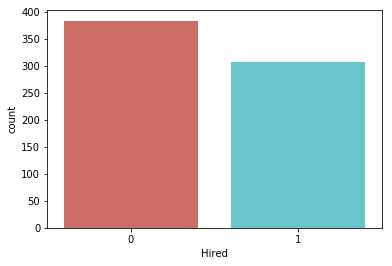

<Figure size 432x288 with 0 Axes>

In [643]:
sns.countplot(x='Hired', data= df, palette ='hls')
plt.show()
plt.savefig('countplot')

Let us get a sense of the numbers across these two classes:


In [644]:
df.groupby('Hired').mean()


,C2,C3,C8,C11,C14,C15
Hired,,,,,,
0,29.029948,3.839948,1.257924,0.631854,196.049608,198.605744
1,33.500814,5.904951,3.427899,4.605863,161.208469,2038.859935


Several observations:

The average C2,C3,C8,C11, C15 of candidate who got hired  is higher than that of the cndidate who didnt.
The average C 14 of candidate who didnt get hired  is higher than that of the cndidate who got hired.

lets Check few other variables too.

In [277]:
df.groupby('C1').mean()


,C2,C3,C8,C11,C14,C15,Hired
C1,,,,,,,
?,31.062500,3.027917,1.166667,0.333333,292.833333,227.583333,0.250000
a,30.479619,5.072690,1.785857,2.580952,157.942857,1033.623810,0.466667
b,31.260150,4.662222,2.446838,2.371795,187.811966,1030.350427,0.440171


In [278]:
df.groupby('C4').mean()


,C2,C3,C8,C11,C14,C15,Hired
C4,,,,,,,
?,35.485000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
l,17.790000,11.187500,5.000000,0.000000,375.000000,50000.000000,1.000000
u,31.748189,5.024326,2.381753,2.741811,180.951830,1008.778420,0.493256
y,28.695828,4.009325,1.766994,1.429448,183.521472,481.226994,0.276074


In [279]:
df.groupby('C5').mean()


,C2,C3,C8,C11,C14,C15,Hired
C5,,,,,,,
?,35.485000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
g,31.748189,5.024326,2.381753,2.741811,180.951830,1008.778420,0.493256
gg,17.790000,11.187500,5.000000,0.000000,375.000000,50000.000000,1.000000
p,28.695828,4.009325,1.766994,1.429448,183.521472,481.226994,0.276074


In [280]:
df.groupby('C6').mean()


,C2,C3,C8,C11,C14,C15,Hired
C6,,,,,,,
?,40.212222,1.106667,0.069444,0.000000,25.555556,37.888889,0.444444
aa,27.846852,5.164259,1.536667,1.296296,174.888889,385.648148,0.351852
c,29.299489,4.401642,2.326314,2.839416,167.131387,829.708029,0.452555
cc,30.297317,4.027561,3.023171,4.756098,222.585366,1928.121951,0.707317
d,27.680333,4.786167,2.356833,1.333333,182.033333,111.266667,0.233333
e,40.350000,8.208400,4.091400,3.040000,163.080000,3042.840000,0.560000
ff,37.291887,5.838019,1.323774,1.716981,112.547170,2349.584906,0.132075
i,31.699322,4.204068,1.952797,1.542373,205.508475,514.423729,0.237288
j,31.426000,4.667000,0.029000,2.700000,122.200000,149.200000,0.300000


In [281]:
df.groupby('C7').mean()

,C2,C3,C8,C11,C14,C15,Hired
C7,,,,,,,
?,40.212222,1.106667,0.069444,0.000000,25.555556,37.888889,0.444444
bb,35.346102,4.699068,3.034746,2.915254,222.694915,1762.271186,0.423729
dd,23.360000,5.326667,0.569167,1.166667,153.166667,485.000000,0.333333
ff,37.025789,5.377105,1.406316,1.859649,107.385965,434.649123,0.140351
h,31.977464,5.368297,3.416667,3.036232,198.833333,968.181159,0.630435
j,30.251250,3.218750,0.281250,1.500000,124.500000,132.625000,0.375000
n,23.085000,4.593750,1.823750,2.750000,123.000000,190.750000,0.500000
o,32.835000,11.667500,0.167500,0.000000,225.000000,50060.000000,0.500000
v,28.641228,4.352845,1.813960,2.192982,187.012531,792.992481,0.423559


# Data Visualization

Let us visualize our data to get a much clearer picture of the data and the significant features.

Bar chart for C4 and the frequency of hiring

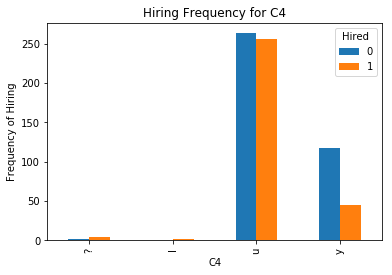

In [282]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df.C4,df.Hired).plot(kind='bar')
plt.title('Hiring Frequency for C4')
plt.xlabel('C4')
plt.ylabel('Frequency of Hiring')
plt.savefig('C4_bar_chart')

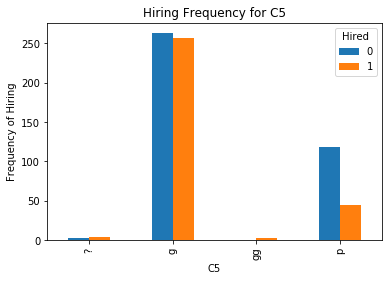

In [283]:
pd.crosstab(df.C5,df.Hired).plot(kind='bar')
plt.title('Hiring Frequency for C5')
plt.xlabel('C5')
plt.ylabel('Frequency of Hiring')
plt.savefig('C5_bar_chart')

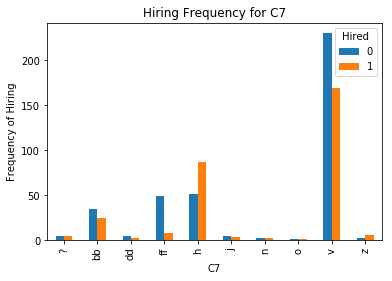

In [284]:
pd.crosstab(df.C7,df.Hired).plot(kind='bar')
plt.title('Hiring Frequency for C7')
plt.xlabel('C7')
plt.ylabel('Frequency of Hiring')
plt.savefig('C7_bar_chart')

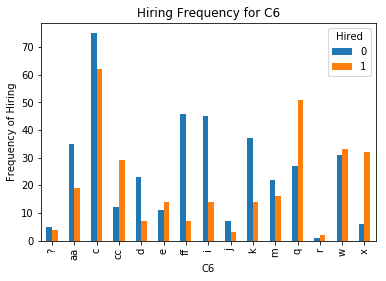

In [285]:
pd.crosstab(df.C6,df.Hired).plot(kind='bar')
plt.title('Hiring Frequency for C6')
plt.xlabel('C6')
plt.ylabel('Frequency of Hiring')
plt.savefig('C6_bar_chart')

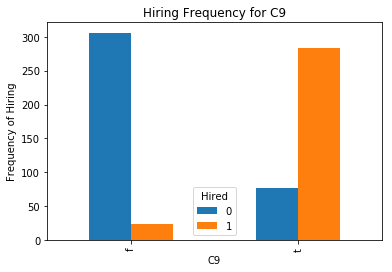

In [286]:
pd.crosstab(df.C9,df.Hired).plot(kind='bar')
plt.title('Hiring Frequency for C9')
plt.xlabel('C9')
plt.ylabel('Frequency of Hiring')
plt.savefig('C9_bar_chart')

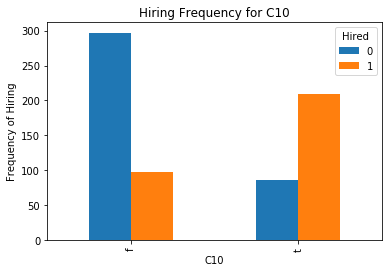

In [287]:
pd.crosstab(df.C10,df.Hired).plot(kind='bar')
plt.title('Hiring Frequency for C10')
plt.xlabel('C10')
plt.ylabel('Frequency of Hiring')
plt.savefig('C10_bar_chart')

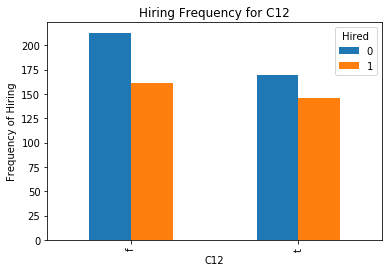

In [288]:
pd.crosstab(df.C12,df.Hired).plot(kind='bar')
plt.title('Hiring Frequency for C12')
plt.xlabel('C12')
plt.ylabel('Frequency of Hiring')
plt.savefig('C12_bar_chart')

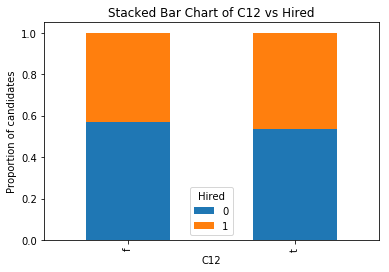

In [289]:
table=pd.crosstab(df.C12, df.Hired)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of C12 vs Hired')
plt.xlabel('C12')
plt.ylabel('Proportion of candidates')
plt.savefig('C12_bar_chart')

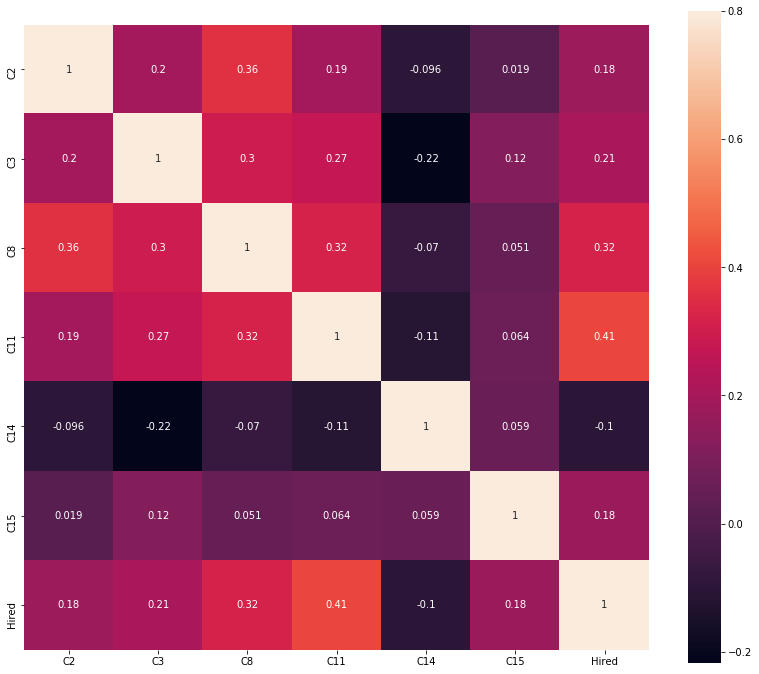

In [290]:
heat_map = df.iloc[:,:]
plt.figure(figsize=(14,12))
sns.heatmap(heat_map.corr(), vmax=0.8, square=True, annot=True)
plt.show()

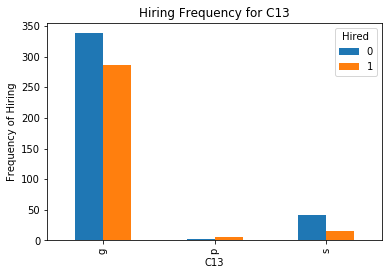

In [291]:
pd.crosstab(df.C13,df.Hired).plot(kind='bar')
plt.title('Hiring Frequency for C13')
plt.xlabel('C13')
plt.ylabel('Frequency of Hiring')
plt.savefig('C13_bar_chart')

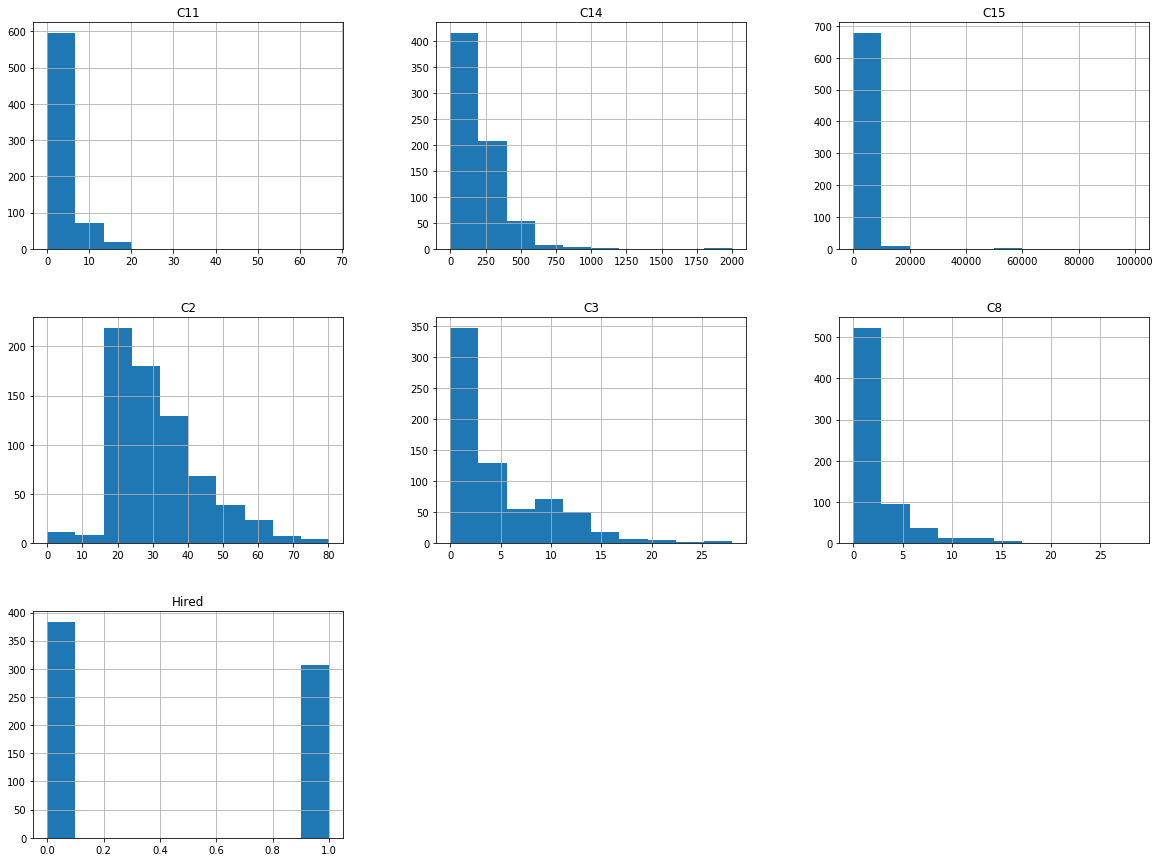

In [292]:
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

# Create dummy variables for categorical variables


There are multiple categorical variables in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [647]:
cat_vars=['C1','C4','C5','C6','C7','C9','C10','C12','C13']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    hr1=df.join(cat_list)
    df=hr1
    

The actual categorical variable needs to be removed once the dummy variables have been created.

Column names after creating dummy variables for categorical variables:


In [648]:
df.drop(df.columns[[0,3,4,5,6,8,9,11,12]], axis=1, inplace=True)
df.columns.values

array(['C2', 'C3', 'C8', 'C11', 'C14', 'C15', 'Hired', 'C1_?', 'C1_a',
       'C1_b', 'C4_?', 'C4_l', 'C4_u', 'C4_y', 'C5_?', 'C5_g', 'C5_gg',
       'C5_p', 'C6_?', 'C6_aa', 'C6_c', 'C6_cc', 'C6_d', 'C6_e', 'C6_ff',
       'C6_i', 'C6_j', 'C6_k', 'C6_m', 'C6_q', 'C6_r', 'C6_w', 'C6_x',
       'C7_?', 'C7_bb', 'C7_dd', 'C7_ff', 'C7_h', 'C7_j', 'C7_n', 'C7_o',
       'C7_v', 'C7_z', 'C9_f', 'C9_t', 'C10_f', 'C10_t', 'C12_f', 'C12_t',
       'C13_g', 'C13_p', 'C13_s'], dtype=object)

The outcome variable is “Hired”, and all the other variables are predictors.


In [649]:
df.head()
df.dtypes

C2       float64
C3       float64
C8       float64
C11        int64
C14        int64
C15        int64
Hired      int64
C1_?       uint8
C1_a       uint8
C1_b       uint8
C4_?       uint8
C4_l       uint8
C4_u       uint8
C4_y       uint8
C5_?       uint8
C5_g       uint8
C5_gg      uint8
C5_p       uint8
C6_?       uint8
C6_aa      uint8
C6_c       uint8
C6_cc      uint8
C6_d       uint8
C6_e       uint8
C6_ff      uint8
C6_i       uint8
C6_j       uint8
C6_k       uint8
C6_m       uint8
C6_q       uint8
C6_r       uint8
C6_w       uint8
C6_x       uint8
C7_?       uint8
C7_bb      uint8
C7_dd      uint8
C7_ff      uint8
C7_h       uint8
C7_j       uint8
C7_n       uint8
C7_o       uint8
C7_v       uint8
C7_z       uint8
C9_f       uint8
C9_t       uint8
C10_f      uint8
C10_t      uint8
C12_f      uint8
C12_t      uint8
C13_g      uint8
C13_p      uint8
C13_s      uint8
dtype: object

In [650]:
df_vars=df.columns.values.tolist()
y=['Hired']
X=[i for i in df_vars if i not in y]

# Feature Selection


The Recursive Feature Elimination (RFE) works by recursively removing variables and building a model on those variables that remain. 
It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute.

Let’s use feature selection to help us decide which variables are significant that can predict employee hiring with great accuracy. 
There are total 52 columns in X, how about select 10?

In [651]:
model = LogisticRegression()
rfe = RFE(model, 5)
rfe = rfe.fit(df[X], df[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\manjeet.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False  True  True False  True False False
 False  True False]
[44 45 39 34 46 47 18 37 36 11  4 17  9  3  8  2  7 32 15 42  6 24 20  5
 14 25 16 30 38 28 22  1 35 31 43 13 21 23 10 19 41 33  1  1 12  1 29 40
 27  1 26]


You can see that RFE chose the 10 variables for us, which are marked True in the support_ array 
and marked with a choice “1” in the ranking_array. 

In [652]:
# cols=['C4_?', 'C4_y', 'C5_g', 'C6_c', 'C6_e', 'C6_w', 'C9_t', 'C9_f', 'C10_t', 'C13_p'] 
#After triying multiple varibale , I will pick the best 3.

cols=['C9_t', 'C9_f', 'C10_t']
X=df[cols]
y=df['Hired']

# Logistic Regression Model

In [653]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [654]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.860


# Random Forest

In [655]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [656]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.860


# Support Vector Machine

In [657]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [658]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.860


All three models are very close but I will pick---  Random Forrest. 

# Cross Validation

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. 
We are using 10-fold Cross-Validation to train our Random Forest model.

In [660]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.853


The average accuracy remains very close to the Random Forrest model accuracy; 
hence, we can conclude that the model generalizes well.

# Precision and recall
We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.

# Random Forrest

In [661]:
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.81      0.87       117
          1       0.79      0.92      0.85        90

avg / total       0.87      0.86      0.86       207



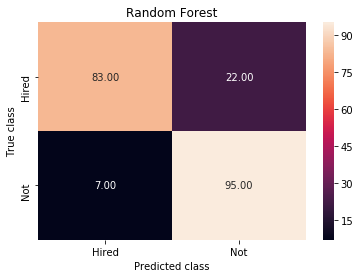

In [662]:
y_pred = rf.predict(X_test)
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Hired", "Not"] , yticklabels = ["Hired", "Not"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

# Logistic Regression

In [663]:
print(classification_report(y_test, svc.predict(X_test)))


             precision    recall  f1-score   support

          0       0.93      0.81      0.87       117
          1       0.79      0.92      0.85        90

avg / total       0.87      0.86      0.86       207



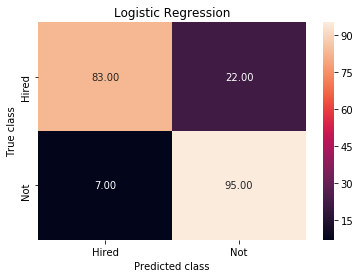

In [669]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Hired", "Not"] , yticklabels = ["Hired", "Not"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

# Support Vector Machine

In [665]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.81      0.87       117
          1       0.79      0.92      0.85        90

avg / total       0.87      0.86      0.86       207



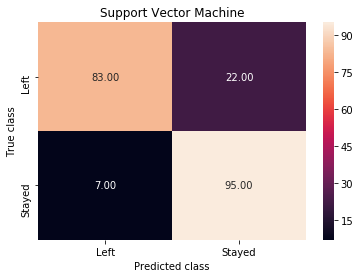

In [666]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f', xticklabels = ["Hired", "Not"] , yticklabels = ["Hired", "Not"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

Firstly -All the models are pretty close.

When a candidate is hired, how often does my classifier predict that correctly? This measurement is called “recall” and a quick look at these diagrams can demonstrate that Random Forrest is doing fairly for this criteria. Out of all the turnover cases, Random Forrest correctly retrieved 83 out of 90. 
This translates to a turnover “recall” of about 92% (83/90).

When a classifier predicts an cadidate will et hired, how often does that employee actually hired? 
This measurement is called “precision”. Random Forrest is performing well here too.

# The ROC Curve

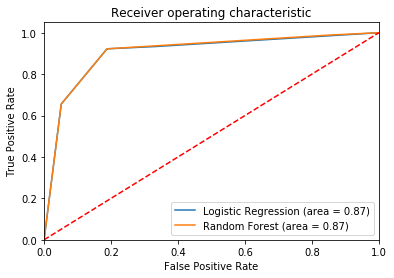

In [667]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. 
The dotted line represents the ROC curve of a purely random classifier; 
a good classifier stays as far away from that line as possible (toward the top-left corner).

# Feature Importance for Random Forest Model

In [670]:
feature_labels = np.array([ 'C9_t', 'C9_f', 'C10_t'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

C9_f-19.59%
C10_t-22.71%
C9_t-57.70%


According to our Random Forest model, 
the above shows the most important features which influence whether an candidate will be hired by the company, in ascending order.